# Topic Modelling Notebook to Illustrate the Qualkit Package

Due to data confidentiality we cannot demo the code using the DEI data, therefore Amazon Review data was chosen as the closest type of data to survey responses. Individuals write reviews to express opinions and describe their experiences regarding products on the Amazon.com website.

Data for this demo obtained from [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products)

Full documentation for Qualkit available from the [GitHub Repository](https://github.com/JiscDACT/qualkit)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#warnings.warn(msg, category=FutureWarning)
#To keep the demo clean

## 1. Data Setup

In [2]:
#Import the following Packages

from qualkit import clean
from qualkit.anchored_topic_model import anchored_topic_model, topic_metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#FYI needed to run this in Jupyter notebooks version
import nltk
#nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jennifer.cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jennifer.cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jennifer.cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jennifer.cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jennifer.cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read in the CSV data

In [3]:
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [4]:
df.shape

(28332, 24)

The data contains lots of different types of Amazon products

In [5]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


Subset the data to focus on the reviews of one particular product

![alt text](firehd.png "Amazon Tablet")


In [6]:
fire_df = df[df['name'].str.contains("Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers")]

fire_df = fire_df[["reviews.rating", "reviews.title", "reviews.text"]]


In [7]:
fire_df.head()

,reviews.rating,reviews.title,reviews.text
25889,5,. Nice hand sized tablet,While there are some apps that are missing due...
25890,4,2nd purchase,I bought one last year for one cousin and had ...
25891,4,3rd time is the charm,I will try again for the 3rd time with my new ...
25892,5,5 star service,"bought this for my father, who never did much ..."
25893,5,7 year old granddaughter loves it,This was a request from our 7 yr old granddaug...


Adding a few 'dont knows' or 'couldnt say' and blanks into this dataframe to illustrate how Qualkit functions can be used to clean this up

In [8]:
unhelpful_responses = pd.DataFrame({"reviews.rating":[1, 3, 5],
                    "reviews.title":["It is ok", "Not sure", " "],
                    "reviews.text":["I dont know","I cant think of anything"," "]})

fire_df = fire_df.append(unhelpful_responses).reset_index()

In [9]:
fire_df.iloc[-10:]

,index,reviews.rating,reviews.title,reviews.text
2436,28325,5,"wow, over the top happy","its fast, it has good lighting. its got the 16..."
2437,28326,5,Wow!,"Where do I begin...good clarity, I love the si..."
2438,28327,5,Xmas gift,I got 2 of these for my 8 yr old twins. My 11 ...
2439,28328,4,yes it is a great tablet.,I bought this for my niece for a Christmas gif...
2440,28329,5,You get a lot for the price!,"Very nice for light internet browsing, keeping..."
2441,28330,5,You get the entire World for less than $100!,This Tablet does absolutely everything I want!...
2442,28331,4,You get what your paying for,"At ninety dollars, the expectionations are low..."
2443,0,1,It is ok,I dont know
2444,1,3,Not sure,I cant think of anything
2445,2,5,,


In [11]:
fire_df.shape

(2446, 4)

## 2. Qualkit Functions: Cleanup

The 'clean' function is a utility for cleaning up text prior to use with other tools.
* Change case to lowercase
* Remove apostrophes
* Replace punctuation with spaces
* Remove duplicate whitespace
* Remove spaces at the start and end of a string
* Replace domain-specific synonyms with their generic terms

In [13]:
questions = ['reviews.text'] #Replace this with column name containing review/survey data
fire_df = clean.clean(fire_df, questions, inplace=False) #False keeps OG quotes

In [14]:
fire_df.shape

(2446, 5)

We have an extra column with the original data

In [15]:
pd.options.display.max_colwidth

50

In [16]:
pd.options.display.max_colwidth = 500

In [18]:
fire_df.head()

,index,reviews.rating,reviews.title,reviews.text,cleaned
0,25889,5,. Nice hand sized tablet,"While there are some apps that are missing due to not using the Google Play Store the list is minimal. The tablet itself is quick, responsive, and noticeable nicer than the 7"" fire. Picked this up when it was on sale for black friday sales. It's great for in front of the TV and catching up on email and light web browsing.",while there are some apps that are missing due to not using the google play store the list is minimal the tablet itself is quick responsive and noticeable nicer than the fire picked this up when it was on sale for black friday sales its great for in front of the tv and catching up on email and light web browsing
1,25890,4,2nd purchase,I bought one last year for one cousin and had to continue for another this year. Great buy imo.,i bought one last year for one cousin and had to continue for another this year great buy imo
2,25891,4,3rd time is the charm,I will try again for the 3rd time with my new Amazon Fire. It seems to have nice upgrades.,i will try again for the rd time with my new amazon fire it seems to have nice upgrades
3,25892,5,5 star service,"bought this for my father, who never did much on computers and was not sure he would actually use this. He unwrapped it, asked for some games to be downloaded and hasn't looked back! He has used the internet as well as the game apps and couldn't be happier.",bought this for my father who never did much on computers and was not sure he would actually use this he unwrapped it asked for some games to be downloaded and hasnt looked back he has used the internet as well as the game apps and couldnt be happier
4,25893,5,7 year old granddaughter loves it,This was a request from our 7 yr old granddaugter who had always asked her older sister if she could share hers due to we bought this same tablet/size a few yrs earlier. Loved the security/parental control options.Starfall a favorite educational app were told is a must have. Really enjoy Pics/Viber due to their in a different state. Also some games on a time limit. Size and resolution are perfect.,this was a request from our yr old granddaugter who had always asked her older sister if she could share hers due to we bought this same tablet size a few yrs earlier loved the security parental control options starfall a favorite educational app were told is a must have really enjoy pics viber due to their in a different state also some games on a time limit size and resolution are perfect


## 3. Qualkit Functions: Removing unhelpful responses/reviews

Remove any 'don't knows' if we do not want them included.
Note that this removes lots of synonyms like 'no opinion', 'no comment', 'I have no idea' etc.
Also removes NaNs.

In [20]:
fire_df = clean.remove_dont_knows(fire_df, 'cleaned')

In [21]:
fire_df.iloc[-5:]

,index,reviews.rating,reviews.title,reviews.text,cleaned
2438,28327,5,Xmas gift,I got 2 of these for my 8 yr old twins. My 11 yr old has one but this one is better. Perfect way to get them to read,i got of these for my yr old twins my yr old has one but this one is better perfect way to get them to read
2439,28328,4,yes it is a great tablet.,I bought this for my niece for a Christmas gift.she is 9 years old and she love it.,i bought this for my niece for a christmas gift she is years old and she love it
2440,28329,5,You get a lot for the price!,"Very nice for light internet browsing, keeping on top of email, viewing videos, and reading e books, which I like to get free from the library. Good browser, good battery power, fast charge. Very relaxing to sit in a comfy chair and read or browse. Has given me hours of enjoyment and information for a minimal price.",very nice for light internet browsing keeping on top of email viewing videos and reading e books which i like to get free from the library good browser good battery power fast charge very relaxing to sit in a comfy chair and read or browse has given me hours of enjoyment and information for a minimal price
2441,28330,5,You get the entire World for less than $100!,"This Tablet does absolutely everything I want! I can watch TV Shows or Movies, check my Mail, Facebook, Google.......pay all my bills. It processes fast and has a beautiful screen. As I said: Everything I want in a Tablet for less than $100!",this tablet does absolutely everything i want i can watch tv shows or movies check my mail facebook google pay all my bills it processes fast and has a beautiful screen as i said everything i want in a tablet for less than
2442,28331,4,You get what your paying for,"At ninety dollars, the expectionations are low, but this is still a very good table, it's good for light use like watching videos or web browsing, but the camera is a bit lacking, and at certain times the device can freeze or lag. Overall this is a good tablet for $90, I would recommend this to anyone on a budget.",at ninety dollars the expectionations are low but this is still a very good table its good for light use like watching videos or web browsing but the camera is a bit lacking and at certain times the device can freeze or lag overall this is a good tablet for i would recommend this to anyone on a budget


In [22]:
fire_df.shape

(2443, 5)

## 4. Qualkit Functions: Removing unhelpful responses/reviews

Lemmatize the text - this creates a canonical form for each word. So it removes plurals, stems verbs and so on. It will treat words according to their part-of-speech so you may find words which can be both a verb and a noun treated differently and need adding to your anchor terms e.g. "present" (verb; includes presents, presented and presenting) and "presentation" (noun; includes presentations) or "record" (verb;includes records, recorded, recording) and "recording" (noun; includes recordings).

In [23]:
fire_df = clean.lemmatize(fire_df, 'cleaned')

In [24]:
fire_df.head() #missing -> miss, bought-> buy, picked-> pick

,index,reviews.rating,reviews.title,reviews.text,cleaned
0,25889,5,. Nice hand sized tablet,"While there are some apps that are missing due to not using the Google Play Store the list is minimal. The tablet itself is quick, responsive, and noticeable nicer than the 7"" fire. Picked this up when it was on sale for black friday sales. It's great for in front of the TV and catching up on email and light web browsing.",while there be some apps that be miss due to not use the google play store the list be minimal the tablet itself be quick responsive and noticeable nicer than the fire pick this up when it be on sale for black friday sale it great for in front of the tv and catch up on email and light web browse
1,25890,4,2nd purchase,I bought one last year for one cousin and had to continue for another this year. Great buy imo.,i buy one last year for one cousin and have to continue for another this year great buy imo
2,25891,4,3rd time is the charm,I will try again for the 3rd time with my new Amazon Fire. It seems to have nice upgrades.,i will try again for the rd time with my new amazon fire it seem to have nice upgrade
3,25892,5,5 star service,"bought this for my father, who never did much on computers and was not sure he would actually use this. He unwrapped it, asked for some games to be downloaded and hasn't looked back! He has used the internet as well as the game apps and couldn't be happier.",buy this for my father who never do much on computer and be not sure he would actually use this he unwrap it ask for some game to be download and hasnt look back he have use the internet as well a the game apps and couldnt be happy
4,25893,5,7 year old granddaughter loves it,This was a request from our 7 yr old granddaugter who had always asked her older sister if she could share hers due to we bought this same tablet/size a few yrs earlier. Loved the security/parental control options.Starfall a favorite educational app were told is a must have. Really enjoy Pics/Viber due to their in a different state. Also some games on a time limit. Size and resolution are perfect.,this be a request from our yr old granddaugter who have always ask her old sister if she could share hers due to we buy this same tablet size a few yr earlier love the security parental control option starfall a favorite educational app be tell be a must have really enjoy pic viber due to their in a different state also some game on a time limit size and resolution be perfect


## 5. Qualkit Functions: Choosing Starting Number of Topics
A first step in building a model is to see what would be a good number of starting topics. The following code will generate the 'total correlation' (tc) for the question using 1-24 topics. 
Look for a 'peak' where the TC either drops afterwards or stops going up steeply as a good starting number.

In [26]:
metrics = pd.DataFrame(topic_metrics(fire_df, 'cleaned')) #suppress this printing to make quicker

Total correlation with 1 topics = 2.5290871681200793
Total correlation with 2 topics = 3.5824102488461493
Total correlation with 3 topics = 3.9961597034360876
Total correlation with 4 topics = 4.35188110130328
Total correlation with 5 topics = 5.061662325276293
Total correlation with 6 topics = 5.2939679279593275
Total correlation with 7 topics = 5.403510178496677
Total correlation with 8 topics = 5.749399602211755
Total correlation with 9 topics = 6.221039912042572
Total correlation with 10 topics = 6.1522211928394
Total correlation with 11 topics = 6.746337582636157
Total correlation with 12 topics = 6.188576365555746
Total correlation with 13 topics = 6.489748928527931
Total correlation with 14 topics = 6.762859289306553
Total correlation with 15 topics = 6.99614985427055
Total correlation with 16 topics = 7.15885491424165
Total correlation with 17 topics = 7.404509685395487
Total correlation with 18 topics = 7.4796969440961805
Total correlation with 19 topics = 7.576831931650809
To

Produce a visual plot

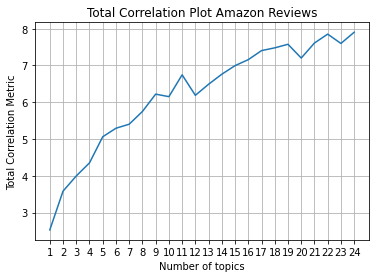

In [27]:
plt.plot(metrics['topics'], metrics['tc'])
plt.title('Total Correlation Plot Amazon Reviews')
plt.xlabel('Number of topics')
plt.ylabel('Total Correlation Metric')
plt.grid(True)
plt.xticks(np.arange(1, 25, 1))
plt.show()

## 6. Qualkit Functions: Fitting an Initial Model

The next stage is to build a model with the number of topics identified but without any anchor terms. The output will probably start to suggest ideas for how to classify the topics.

In [28]:
fire_df = anchored_topic_model(fire_df, 'cleaned', print_topic_details=True, number_of_topics=11)

Total correlation: 6.746337582636157
Topic #1: google, store, google play, apps, dont, android, play store, app store, google play store, app
Topic #2: book, watch, read, game, movie, play game, read book, play, battery life, life
Topic #3: fire, fire hd, kindle fire, kindle, hd, fire tablet, one, kindle fire hd, replace, upgrade
Topic #4: amazon, amazon fire, prime, amazon prime, card, sd, sd card, amazon fire hd, gb, memory
Topic #5: old, year, year old, new, old kindle, old one, new kindle, yr old, yr, replace old
Topic #6: friday, black friday, black, cant beat, beat, member, cant, deal, prime member, beat price
Topic #7: screen, size, clear, weight, perfect size, big, large, light weight, light, resolution
Topic #8: gift, christmas, love, buy, wife, daughter, friendly, christmas gift, user friendly, daughter love
Topic #9: need, ipad, control, parental, point, first, parental control, everything need, go, price point
Topic #10: price, good, great price, value, tablet price, good t

In [29]:
counts = fire_df["Topic label"].value_counts(sort=True)
proportions = fire_df["Topic label"].value_counts(normalize=True)

props = pd.concat([counts, proportions], axis=1)
props.columns = ['count', 'proportion']

print(props)

                                                                                                    count  \
book, watch, read, game, movie, play game, read book, play, battery life, life                        460   
No matching topic                                                                                     352   
google, store, google play, apps, dont, android, play store, app store, google play store, app        331   
fire, fire hd, kindle fire, kindle, hd, fire tablet, one, kindle fire hd, replace, upgrade            279   
gift, christmas, love, buy, wife, daughter, friendly, christmas gift, user friendly, daughter love    230   
price, good, great price, value, tablet price, good tablet, money, nice, tablet good, cheap           182   
screen, size, clear, weight, perfect size, big, large, light weight, light, resolution                170   
old, year, year old, new, old kindle, old one, new kindle, yr old, yr, replace old                    132   
friday, black frida

From this you can start to see potential topic names/labels which describe a collective of words

In [30]:
fire_df = fire_df.drop(columns=['Topic label', 'Topic name']) #Removing these columns which get added ready for running the final model

In [41]:
fire_df.head()

,index,reviews.rating,reviews.title,reviews.text,cleaned,Topic label,Topic name
0,25889,5,. Nice hand sized tablet,"While there are some apps that are missing due to not using the Google Play Store the list is minimal. The tablet itself is quick, responsive, and noticeable nicer than the 7"" fire. Picked this up when it was on sale for black friday sales. It's great for in front of the TV and catching up on email and light web browsing.",while there be some apps that be miss due to not use the google play store the list be minimal the tablet itself be quick responsive and noticeable nicer than the fire pick this up when it be on sale for black friday sale it great for in front of the tv and catch up on email and light web browse,"store, google, apps, android, google play, play store, app, app store, google play store, dont",Apps
1,25890,4,2nd purchase,I bought one last year for one cousin and had to continue for another this year. Great buy imo.,i buy one last year for one cousin and have to continue for another this year great buy imo,No matching topic,No matching topic
2,25891,4,3rd time is the charm,I will try again for the 3rd time with my new Amazon Fire. It seems to have nice upgrades.,i will try again for the rd time with my new amazon fire it seem to have nice upgrade,"kindle, replace, upgrade, kindle fire, new, old kindle, one, old one, love kindle, replace old",Replace and Upgrade
3,25892,5,5 star service,"bought this for my father, who never did much on computers and was not sure he would actually use this. He unwrapped it, asked for some games to be downloaded and hasn't looked back! He has used the internet as well as the game apps and couldn't be happier.",buy this for my father who never do much on computer and be not sure he would actually use this he unwrap it ask for some game to be download and hasnt look back he have use the internet as well a the game apps and couldnt be happy,"store, google, apps, android, google play, play store, app, app store, google play store, dont",Apps
4,25893,5,7 year old granddaughter loves it,This was a request from our 7 yr old granddaugter who had always asked her older sister if she could share hers due to we bought this same tablet/size a few yrs earlier. Loved the security/parental control options.Starfall a favorite educational app were told is a must have. Really enjoy Pics/Viber due to their in a different state. Also some games on a time limit. Size and resolution are perfect.,this be a request from our yr old granddaugter who have always ask her old sister if she could share hers due to we buy this same tablet size a few yr earlier love the security parental control option starfall a favorite educational app be tell be a must have really enjoy pic viber due to their in a different state also some game on a time limit size and resolution be perfect,"store, google, apps, android, google play, play store, app, app store, google play store, dont",Apps


## 6. Qualkit Functions: Fitting a final user input model (Iterative Process)

The next stage is to build a model using anchor terms. You need to specify a list of topic names, and the anchor terms to go with them. This is the stage where you can get user input on topic names, key words to guide the model.

The topic names are just to make it easier to understand what you think the topic is - it doesn't affect the model in any way, and you can change them at any time.
Note that they are in order, so the first name is topic 1, the second topic 2 etc.

In [32]:
topic_names = [
      'Apps',
      'Features',
      'Replace and Upgrade',
      'Memory/Storage',
      'Streaming',
      'Deal',
      'Size',
      'Recipient',
      'Parental Control',    
      'Price',
      'Recommendation'
]

In [33]:
anchors = [
      ['google', 'store', 'google play', 'apps', 'android', 'play store', 'app store', 'google play store', 'app'],
      ['book', 'watch', 'read', 'game', 'movie', 'play game', 'read book', 'play', 'battery life', 'life', 'user friendly'],
      ['replace', 'upgrade', 'replace old', 'old kindle', 'old one'],
      ['sd', 'sd card', 'gb', 'memory'],
      ['amazon fire', 'prime', 'amazon prime'], #Might be a tablet expert who recommends streaming added 
      ['black friday', 'prime member', 'beat price', 'member', 'cant beat'],
      ['screen', 'size', 'clear', 'weight', 'perfect size', 'big', 'large', 'light weight', 'light', 'resolution'],
      ['gift', 'christmas', 'wife', 'daughter', 'christmas gift', 'daughter'],
      ['control', 'parental', 'parental control'],
      ['price', 'great price', 'value', 'tablet price', 'money', 'cheap'],
      ['quality', 'recommend', 'best buy', 'highly', 'overall', 'highly recommend']
]

In [34]:
fire_df = anchored_topic_model(fire_df, 'cleaned', topic_names=topic_names, anchors=anchors, print_topic_details=True)

Total correlation: 10.63597774479783
Topic #1: store, google, apps, android, google play, play store, app, app store, google play store, dont
Topic #2: book, game, watch, read, movie, life, play, play game, read book, battery life
Topic #3: kindle, replace, upgrade, kindle fire, new, old kindle, one, old one, love kindle, replace old
Topic #4: memory, gb, sd, sd card, card, need, wrong, go wrong, micro, storage
Topic #5: prime, amazon fire, fire hd, fire, hd, amazon, amazon prime, amazon fire hd, kindle fire hd, hd tablet
Topic #6: black friday, cant beat, friday, member, black, prime member, beat price, beat, cant, cant beat price
Topic #7: screen, size, big, light, resolution, clear, large, weight, perfect size, light weight
Topic #8: gift, christmas, wife, daughter, christmas gift, love, buy, daughter love, absolutely love, wife love
Topic #9: year, year old, old, control, parental, parental control, yr old, yr, buy year, old son
Topic #10: price, great price, value, cheap, tablet p

In [36]:
counts = fire_df["Topic label"].value_counts(sort=True)
proportions = fire_df["Topic label"].value_counts(normalize=True)

props = pd.concat([counts, proportions], axis=1)
props.columns = ['count', 'proportion']

print(props)

                                                                                                        count  \
book, game, watch, read, movie, life, play, play game, read book, battery life                            512   
No matching topic                                                                                         423   
store, google, apps, android, google play, play store, app, app store, google play store, dont            316   
kindle, replace, upgrade, kindle fire, new, old kindle, one, old one, love kindle, replace old            275   
gift, christmas, wife, daughter, christmas gift, love, buy, daughter love, absolutely love, wife love     228   
screen, size, big, light, resolution, clear, large, weight, perfect size, light weight                    208   
price, great price, value, cheap, tablet price, money, good, low, low price, great tablet price           161   
prime, amazon fire, fire hd, fire, hd, amazon, amazon prime, amazon fire hd, kindle fire hd, hd 

## 6. Qualkit Functions: Fitting a final user input model (Iterative Process)

To help shape the model, its good to get an idea of what responses aren't being matched by the topic model we've created. The code below will output another topic model just using the responses
that didn't match any of the topics in the main model above. This is useful for seeing if there are any patterns that suggest missing terms or missing topics.

In [37]:
print("\nUnmatched topics\n")
unmatched = fire_df[(fire_df['Topic label'] == 'No matching topic')].copy()
unmatched = unmatched.drop(columns=['Topic label', 'Topic name'])

print(len(unmatched)) # this prints the number of unmatched rows
unmatchedmodel = anchored_topic_model(unmatched, 'cleaned', number_of_topics=2, print_topic_details=True)


Unmatched topics

423
Total correlation: 0.5040788400270084
Topic #1: love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing
Topic #2: great, easy, one, great tablet, reader, happy, set, pleased, work great, tablet easy


For example 'user friendliness' or 'positive reviews' may be something to consider during the model iterations

In [59]:
unmatchedmodel.head(10)

,index,reviews.rating,reviews.title,reviews.text,cleaned,Topic label,Topic name
1,25890,4,2nd purchase,I bought one last year for one cousin and had to continue for another this year. Great buy imo.,i buy one last year for one cousin and have to continue for another this year great buy imo,No matching topic,No matching topic
5,25894,1,"8"" fire 16gb tablet",I am bring it back for an exchange. (a different make),i be bring it back for an exchange a different make,No matching topic,No matching topic
8,25897,5,A gift,She loves it . it's the best thing we could of ever brought her,she love it it the best thing we could of ever bring her,"love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing","love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing"
28,25917,5,A perfect gift for grandkids!!,Bought this for each of my grandchildren and they loved it. Very user friendly,buy this for each of my grandchild and they love it very user friendly,"love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing","love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing"
34,25923,4,"Adequate 8"" Tablet","I purchased this for a small child to use. She is quite happy with it, however it was a little too slow for my taste.",i purchase this for a small child to use she be quite happy with it however it be a little too slow for my taste,No matching topic,No matching topic
37,25926,5,Affordable,Great product for my 8 year & affordable.. had 2 months & no problems,great product for my year affordable have month no problem,No matching topic,No matching topic
41,25930,4,All about the free play,The kids more expensive tablets died twice. Repair was more than the Fire brand new.,the kid more expensive tablet die twice repair be more than the fire brand new,"love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing","love, kid, user, friendly, husband, enjoy, first, user friendly, buy tablet, thing"
48,25937,5,Amazing product,Amazing product from Amazon within budget and get the best outcome of it,amaze product from amazon within budget and get the best outcome of it,No matching topic,No matching topic
53,25942,5,Amazing!,I didn't expect anything less than what I got with this Kindle.,i didnt expect anything less than what i get with this kindle,No matching topic,No matching topic
55,25944,3,Amazon,Tablet stopped working after owning for two weeks. Came back on after an hour.,tablet stop work after own for two week come back on after an hour,No matching topic,No matching topic
